In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")
import numpy as np

from data_loading import load_runs

In [3]:
RUN = ["1"]

## Defining numu sidebands

In [4]:
rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUN,
    data="muon_sideband",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=True,
    loadsystematics=True,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=False,
    blinded=False, 
    enable_cache=True,
)

Loading run 1
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading


In [5]:
for key in rundata_numu:
    rundata_numu[key]['npi'] = rundata_numu[key].eval('npion+npi0')

In [6]:
### To Accomodate Detvars, Use Multiple Singal Generators ###
from microfit.histogram import Binning, MultiChannelBinning
from microfit import histogram as hist
import make_detsys as detsys

In [7]:
numu_np_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
selection = "NUMUNP0PI"
preselection = "NUMU"
numu_np_binning.label = "NUMUNP0PI"

numu_np_detvars = detsys.make_variations(
    RUN,
    "muon_sideband",
    selection,
    preselection,
    numu_np_binning,
    make_plots=False,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadshowervariables=True,
    loadsystematics=False,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=False,
    blinded=False, 
    enable_cache=True,
)

signal_generator_numu_np_detvars = hist.RunHistGenerator(
    rundata_numu,
    numu_np_binning,
    data_pot=data_pot_numu,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=numu_np_detvars
)

Loading devar histograms from file: /uboone/data/users/cthorpe/cached_detvars//run_1_NUMU_NUMUNP0PI_neutrino_energy.json


In [8]:
numu_zp_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
selection = "NUMU0P0PI"
preselection = "NUMU"
numu_zp_binning.label = "NUMU0P0PI"

numu_zp_detvars = detsys.make_variations(
    RUN,
    "muon_sideband",
    selection,
    preselection,
    numu_zp_binning,
    make_plots=False,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadshowervariables=True,
    loadsystematics=False,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=False,
    blinded=False, 
    enable_cache=True,
)

signal_generator_numu_zp_detvars = hist.RunHistGenerator(
    rundata_numu,
    numu_zp_binning,
    data_pot=data_pot_numu,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=numu_zp_detvars
)

Loading devar histograms from file: /uboone/data/users/cthorpe/cached_detvars//run_1_NUMU_NUMU0P0PI_neutrino_energy.json


## Define two-shower sideband

In [9]:
RUN = ["1"]  
rundata_pi0, mc_weights_pi0, data_pot_pi0 = load_runs(
    RUN,
    data="two_shr_sideband",
    truth_filtered_sets=["nue", "drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=False,
    loadsystematics=True,
    load_crt_vars=False,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    enable_cache=True,
    blinded=False,
)

Loading run 1
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading


In [10]:
pi0_binning = Binning.from_config("reco_e", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
selection = "PI0"
preselection = "PI0"
pi0_binning.label = "PI0"

pi0_detvars = detsys.make_variations(
    RUN,
    "two_shr_sideband",
    selection,
    preselection,
    pi0_binning,
    make_plots=True,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=False,
    loadsystematics=False,
    load_crt_vars=False,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    enable_cache=True,
    blinded=False
)

signal_generator_pi0 = hist.RunHistGenerator(
    rundata_pi0,
    pi0_binning,
    data_pot=data_pot_pi0,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=pi0_detvars
)

Loading devar histograms from file: /uboone/data/users/cthorpe/cached_detvars//run_1_PI0_PI0_reco_e.json


## Load the signals

In [11]:
RUN = ["1"]
signal_rundata, signal_mc_weights, signal_data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    truth_filtered_sets=["nue", "drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    enable_cache=True,
    blinded=True,
)

Loading run 1


In [12]:
from microfit.parameters import Parameter, ParameterSet
from microfit.signal_generators import SignalOverBackgroundGenerator
from microfit.run_plotter import RunHistPlotter


signal_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),
    ]
)

In [13]:
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

zp_binning = Binning.from_config(*binning_def)
#zp_binning.set_selection(preselection="ZP", selection="ZPBDT")
zp_binning.label = "ZPBDT"
selection = "ZPBDT"
preselection = "ZP"

zp_detvars = detsys.make_variations(
    RUN,
    "bnb",
    selection+"_GoodBG",
    preselection,
    zp_binning,
    make_plots=True,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=False,
    load_lee=True,
    enable_cache=True,
    blinded=True,
)

signal_generator_misc_bg_zp = hist.RunHistGenerator(
    signal_rundata,
    zp_binning,
    data_pot=signal_data_pot,
    selection=selection+"_MiscBG",
    preselection=preselection,
    uncertainty_defaults={"include_multisim_errors": False,"include_unisim_errors": False},
)

extra_frac_unc = 0.2

pred_hist_misc = signal_generator_misc_bg_zp.get_total_prediction(include_multisim_errors=False,add_precomputed_detsys=False)
nominal_values = pred_hist_misc.bin_counts

extra_cov = np.zeros(shape=(zp_binning.n_bins,zp_binning.n_bins))
for i in range(0,zp_binning.n_bins-1):
    extra_cov[i][i] = extra_frac_unc**2*nominal_values[i]**2

signal_generator_zp = hist.RunHistGenerator(
    signal_rundata,
    zp_binning,
    data_pot=signal_data_pot,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=zp_detvars,
    parameters=signal_parameters,
    extra_mc_covariance=extra_cov
)

Loading devar histograms from file: /uboone/data/users/cthorpe/cached_detvars//run_1_ZP_ZPBDT_GoodBG_reco_e.json


In [14]:
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

np_binning = Binning.from_config(*binning_def)
#p_binning.set_selection(preselection="P", selection="NPBDT")
np_binning.label = "NPBDT"
selection = "NPBDT"
preselection = "NP"

np_detvars = detsys.make_variations(
    RUN,
    "bnb",
    selection+"_GoodBG",
    preselection,
    np_binning,
    make_plots=True,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=False,
    load_lee=True,
    enable_cache=True,
    blinded=True,
)

signal_generator_misc_bg_np = hist.RunHistGenerator(
    signal_rundata,
    np_binning,
    data_pot=signal_data_pot,
    selection=selection+"_MiscBG",
    preselection=preselection,
    uncertainty_defaults={"include_multisim_errors": False,"include_unisim_errors": False},
)

extra_frac_unc = 0.2

pred_hist_misc = signal_generator_misc_bg_np.get_total_prediction(include_multisim_errors=False,add_precomputed_detsys=False)
nominal_values = pred_hist_misc.bin_counts

extra_cov = np.zeros(shape=(np_binning.n_bins,np_binning.n_bins))
for i in range(0,np_binning.n_bins-1):
    extra_cov[i][i] = extra_frac_unc**2*nominal_values[i]**2

signal_generator_np = hist.RunHistGenerator(
    signal_rundata,
    np_binning,
    data_pot=signal_data_pot,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=np_detvars,
    parameters=signal_parameters,
    extra_mc_covariance=extra_cov,
    enable_cache=False
)

Loading devar histograms from file: /uboone/data/users/cthorpe/cached_detvars//run_1_NP_NPBDT_GoodBG_reco_e.json


[0.35160392 1.50409857 2.38056609 2.81542378 2.09507782 2.80740681
 1.8034686  1.32978645 1.15327039 0.97089849]
[[0.33261391 1.69382127 2.44072408 2.99566847 2.16134448 3.18717542
  1.78677968 1.34790961 1.15853607 0.99679234]
 [0.27020229 1.1928163  1.75144013 2.10462593 1.66937888 2.2015734
  1.37823503 1.01567991 0.94391637 0.79395568]
 [0.2568382  1.10261762 1.91023526 1.9552855  1.61800562 2.5400025
  1.37660703 1.05221676 0.93432664 0.80568285]
 [0.37259243 1.36478453 2.18207563 2.79982135 2.04882638 2.42316876
  1.71868874 1.22317541 1.08913792 0.94829032]
 [0.22559179 1.08268753 1.74895271 2.07109109 1.50840955 2.20644896
  1.25988741 0.89574    0.81572158 0.71794401]
 [0.38471865 1.35115459 2.45505906 2.72293714 2.193813   2.95477058
  1.92209976 1.42582946 1.21049203 1.01223775]
 [0.30622296 1.36698573 2.18618766 2.66035424 1.89884844 2.5132197
  1.5991812  1.15987469 1.04069833 0.83505166]
 [0.30913515 1.46005553 1.75942361 2.32118343 1.74868534 2.4704516
  1.52755423 1.083

[0.35160392 1.50409857 2.38056609 2.81542378 2.09507782 2.80740681
 1.8034686  1.32978645 1.15327039 0.97089849]
[[0.35233494 1.52567545 2.38976247 2.81073382 2.08777717 2.78613558
  1.82060352 1.32892578 1.14805968 0.98524198]
 [0.35573396 1.56512783 2.40320145 2.80480084 2.08393124 2.75743538
  1.87069462 1.33384104 1.14183568 1.02150315]
 [0.34167962 1.50541882 2.39091499 2.81252855 2.08722825 2.80044615
  1.75127651 1.30681203 1.15842958 0.9350501 ]
 [0.35181191 1.49797516 2.37611997 2.81439527 2.09629601 2.81138363
  1.80183312 1.33056125 1.15370152 0.96916801]
 [0.35001365 1.55584141 2.40637377 2.80526404 2.07791927 2.7611323
  1.82191049 1.32111823 1.14471176 0.9898629 ]
 [0.35381771 1.50582443 2.37844915 2.81370115 2.09505665 2.80445827
  1.81852031 1.33417042 1.15084173 0.9809769 ]
 [0.3607716  1.47852022 2.3584266  2.81855161 2.11025534 2.83463411
  1.84815611 1.35323277 1.15263409 0.99392257]
 [0.35324671 1.51405581 2.38334443 2.81262236 2.09188128 2.79665652
  1.81968749 1.

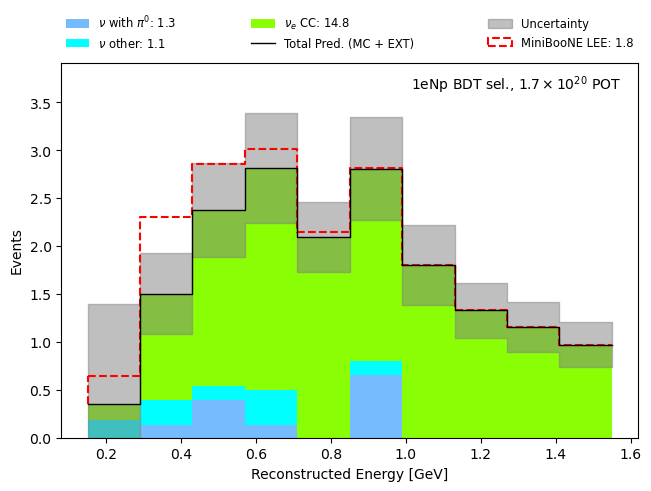

In [15]:
ax = RunHistPlotter(signal_generator_np).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",add_precomputed_detsys=True
)

[1.21566555 0.76516553 0.97368403 0.78317168 0.39482117 0.459028
 0.49063168 0.15903717 0.14248653 0.08751495]
[[1.21426448 0.83419908 1.13596242 0.86972511 0.38867548 0.33018615
  0.56464705 0.15064351 0.13200626 0.08672229]
 [0.90991527 0.74827396 0.84461809 0.59347026 0.23753042 0.32655708
  0.2806912  0.10420115 0.07751537 0.06395134]
 [0.79040479 0.69425579 0.8905156  0.5504794  0.24914    0.29057379
  0.34332577 0.10003246 0.08449926 0.05782402]
 [0.97914533 0.65957071 0.79942976 0.66265683 0.36206306 0.54125491
  0.39579297 0.15636524 0.12555239 0.0885762 ]
 [0.99761322 0.64784292 0.96285063 0.57425206 0.3825281  0.41014441
  0.40048868 0.1387599  0.14691199 0.07230697]
 [0.875784   0.66120154 0.7028056  0.56981526 0.34651852 0.35246171
  0.54963125 0.14087129 0.13585832 0.09081811]
 [1.01392228 0.7114996  0.92437951 0.67139315 0.36624551 0.40642634
  0.47816221 0.14611566 0.13264531 0.07240901]
 [1.23516991 0.66039446 0.97288906 0.66512002 0.2866328  0.44278005
  0.41957432 0.1

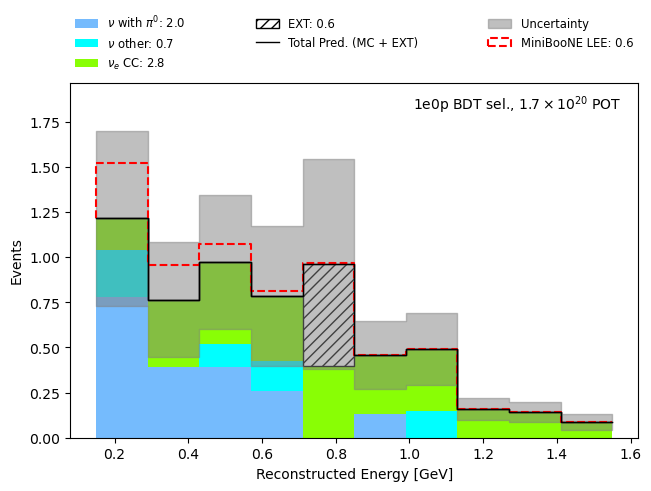

In [16]:
ax = RunHistPlotter(signal_generator_zp).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="ZPBDT",add_precomputed_detsys=True
)

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	5		(0, 10)

[0.35160392 1.50409857 2.38056609 2.81542378 2.09507782 2.80740681
 1.8034686  1.32978645 1.15327039 0.97089849]
[[0.33261391 1.69382127 2.44072408 2.99566847 2.16134448 3.18717542
  1.78677968 1.34790961 1.15853607 0.99679234]
 [0.27020229 1.1928163  1.75144013 2.10462593 1.66937888 2.2015734
  1.37823503 1.01567991 0.94391637 0.79395568]
 [0.2568382  1.10261762 1.91023526 1.9552855  1.61800562 2.5400025
  1.37660703 1.05221676 0.93432664 0.80568285]
 [0.37259243 1.36478453 2.18207563 2.79982135 2.04882638 2.42316876
  1.71868874 1.22317541 1.08913792 0.94829032]
 [0.22559179 1.08268753 1.74895271 2.07109109 1.50840955 2.20644896
  1.25988741 0.89574    0.81572158 0.71794401]
 [0.38471865 1.35115459 2.45505906 2.72293714 2.193813   2.95477058
  1.92209976 1.42582946 1.21049203 1.01223775]
 [0.30622296 1.36698573 2.18618766 2.66035424 1.89884844 2.5132197
  1.5991812  1.15987469 1.04069833 0.

[0.35160392 1.50409857 2.38056609 2.81542378 2.09507782 2.80740681
 1.8034686  1.32978645 1.15327039 0.97089849]
[[0.36686041 1.42130956 2.45688857 2.78613564 2.17002895 2.69400314
  1.82358056 1.32187216 1.18030862 0.97845443]
 [0.34081309 1.49492437 2.49080747 2.95576884 2.25828129 2.95440066
  1.91150931 1.40723851 1.26270719 1.07560424]
 [0.38082174 1.49823136 2.409644   2.69305726 2.05394172 2.53779549
  1.66431968 1.21847751 1.00406677 0.86499404]
 [0.41171132 1.67593658 2.72582744 3.3249926  2.45320473 3.18029883
  2.05963628 1.48118359 1.31372983 1.12410494]
 [0.34724058 1.48149616 2.37354812 2.7321069  2.12067326 2.69258529
  1.78502113 1.31552087 1.11537829 0.9398771 ]
 [0.35292949 1.46246764 2.39468994 2.69872641 2.04603352 2.60833462
  1.66242684 1.23787725 1.02952019 0.91721247]
 [0.37302411 1.54568429 2.45182515 2.76563603 2.13587144 2.6774632
  1.74139891 1.27234377 1.06758856 0.90419189]
 [0.32251623 1.4679998  2.35979139 2.7550354  2.04385561 2.63691896
  1.71611709 1.

[0.35160392 1.50409857 2.38056609 2.81542378 2.09507782 2.80740681
 1.8034686  1.32978645 1.15327039 0.97089849]
[[0.35233494 1.52567545 2.38976247 2.81073382 2.08777717 2.78613558
  1.82060352 1.32892578 1.14805968 0.98524198]
 [0.35573396 1.56512783 2.40320145 2.80480084 2.08393124 2.75743538
  1.87069462 1.33384104 1.14183568 1.02150315]
 [0.34167962 1.50541882 2.39091499 2.81252855 2.08722825 2.80044615
  1.75127651 1.30681203 1.15842958 0.9350501 ]
 [0.35181191 1.49797516 2.37611997 2.81439527 2.09629601 2.81138363
  1.80183312 1.33056125 1.15370152 0.96916801]
 [0.35001365 1.55584141 2.40637377 2.80526404 2.07791927 2.7611323
  1.82191049 1.32111823 1.14471176 0.9898629 ]
 [0.35381771 1.50582443 2.37844915 2.81370115 2.09505665 2.80445827
  1.81852031 1.33417042 1.15084173 0.9809769 ]
 [0.3607716  1.47852022 2.3584266  2.81855161 2.11025534 2.83463411
  1.84815611 1.35323277 1.15263409 0.99392257]
 [0.35324671 1.51405581 2.38334443 2.81262236 2.09188128 2.79665652
  1.81968749 1.

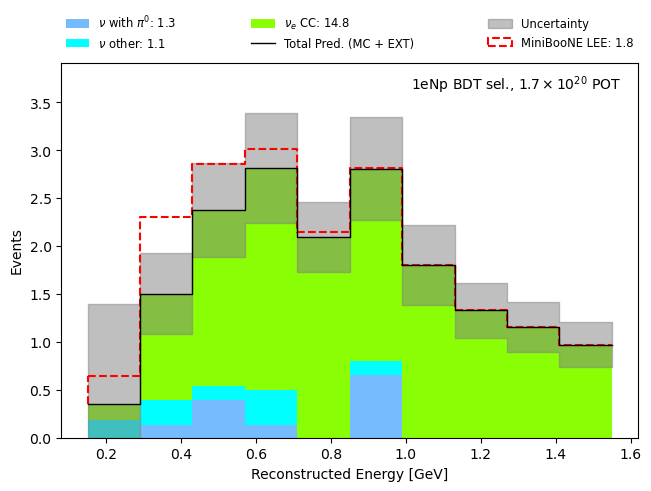

In [17]:
signal_generator_np.parameters["signal_strength"].value = 5.0

print(signal_generator_np.parameters)

ax = RunHistPlotter(signal_generator_np).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",add_precomputed_detsys=True
)

## Assemble Analysis

In [18]:
from microfit.analysis import MultibandAnalysis

analysis = MultibandAnalysis(
    run_hist_generators=[signal_generator_numu_np_detvars,signal_generator_numu_zp_detvars,signal_generator_pi0,signal_generator_zp,signal_generator_np],
    constraint_channels=["NUMUNP0PI", "NUMU0P0PI", "PI0"],
    signal_channels=["NPBDT", "ZPBDT"],
)

In [19]:
analysis.parameters["signal_strength"].value = 1.0

Including detsim uncertainties
Calculating multichannel detsim uncertainties
variations= ['lydown', 'lyatt', 'lyrayleigh', 'wiremodx', 'wiremodthetayz']
datasets= ['mc', 'nue', 'nc_pi0']
Including detsim uncertainties
Calculating multichannel detsim uncertainties
variations= ['lydown', 'lyatt', 'lyrayleigh', 'wiremodx', 'wiremodthetayz']
datasets= ['mc', 'nue', 'nc_pi0']
[[  5.05911002   0.           0.         ...   0.           0.
    0.        ]
 [  0.         171.58745917   0.         ...   0.           0.
    0.        ]
 [  0.           0.         396.37960953 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  19.0109226    0.
    0.        ]
 [  0.           0.           0.         ...   0.          12.15768414
    0.        ]
 [  0.           0.           0.         ...   0.           0.
   11.52573734]]
Including detsim uncertainties
Calculating multichannel detsim uncertainties
variations= ['lydown', 'lyatt', 'lyrayleigh', 'wiremodx', 'wi

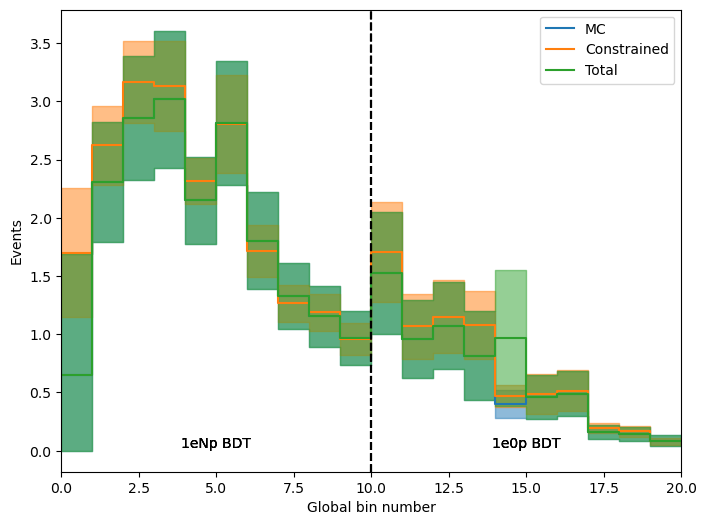

In [31]:
import matplotlib.pyplot as plt

mc_hist = analysis.get_mc_hist(include_multisim_errors=True,add_precomputed_detsys=True)
mc_hist_constrained = analysis.get_mc_hist(include_multisim_errors=True, use_sideband=True,add_precomputed_detsys=True)
total_hist = analysis.generate_multiband_histogram(include_multisim_errors=True, include_non_signal_channels=False,add_precomputed_detsys=True)

fig, ax = plt.subplots(figsize=(8, 6))
mc_hist.draw(ax=ax, label="MC")
mc_hist_constrained.draw(ax=ax, label="Constrained")
total_hist.draw(ax=ax, label="Total")
ax.legend()

In [ ]:
analysis.parameters["signal_strength"].value = 1.0

In [ ]:
RunHistPlotter(analysis).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False, title="Runs 1-5", use_sideband=False,
)

In [ ]:
analysis.plot_signals(
    add_ext_error_floor=False, include_multisim_errors=True, show_data_mc_ratio=False, use_sideband=True,
    separate_figures=True,
)

In [ ]:
analysis.plot_sidebands(
    include_multisim_errors=True,
    show_data_mc_ratio=True,
    add_ext_error_floor=False,
    separate_figures=True,
    save_path="."
)

In [ ]:
analysis.plot_correlation(add_precomputed_detsys=True)

In [ ]:
analysis.parameters

In [ ]:
analysis.parameters["signal_strength"].value = 1.0

multi_channel_mc_hist = analysis.generate_multiband_histogram(
    include_multisim_errors=True,
    include_non_signal_channels=True,
)

In [ ]:
multi_channel_mc_hist.draw()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))
# Getting the channels in the same order as in Giuseppe's plots
channels = ["NPBDT", "ZPBDT", "NUMUNP0PI", "NUMU0P0PI", "PI0"]
multi_channel_mc_hist[channels].draw_covariance_matrix(ax=ax)

In [ ]:
multi_channel_hist_unconstrained = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=False,
)

multi_channel_hist_new_constraints = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=True,
    constraint_channels=["NUMUNP0PI", "NUMU0P0PI", "PI0"],
)

'''
multi_channel_hist_old_constraints = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=True,
    constraint_channels=["NUMU"],
)
'''

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
multi_channel_hist_unconstrained.draw(ax=ax, label="Unconstrained Signal", color="black")
multi_channel_hist_old_constraints.draw(ax=ax, label="NUMUCRT Constraint")
multi_channel_hist_new_constraints.draw(ax=ax, label="New Constraints")

ax.legend()
ax.set_title("Signal Channels, Runs 1-5, MC+EXT")
fig.savefig("signal_channels_runs1-5_constraint_comparison.pdf")


## Get the Sensitivity

In [ ]:
analysis.constraint_channels = ["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

two_hypo_result_new_constraints = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    n_trials=10000,
)

In [ ]:
analysis.constraint_channels = ["NUMUCRT"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

two_hypo_result_old_constraints = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    n_trials=10000,
)

In [ ]:
plt.figure(figsize=(5, 4))
plt.hist(two_hypo_result_old_constraints["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result_old_constraints["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result_old_constraints["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result_old_constraints['median_pval']:.3f}")
plt.legend()
plt.xlabel(r"$\Delta \chi^2$")
plt.ylabel("Samples")
plt.title("Runs 1-5, NUMUCRT Constraint")
plt.savefig("runs1-5_sensitivity_numucrt_constraint.pdf")
plt.show()

In [ ]:
plt.figure(figsize=(5, 4))
plt.hist(two_hypo_result_new_constraints["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result_new_constraints["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result_new_constraints["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result_new_constraints['median_pval']:.3f}")
plt.legend()
plt.xlabel(r"$\Delta \chi^2$")
plt.ylabel("Samples")
plt.title("Runs 1-5, New Constraints")
plt.savefig("runs1-5_sensitivity_new_constraints.pdf")
plt.show()

In [ ]:
import numpy as np

scan_points = np.linspace(0, 5, 40)
asimov_scan_points = np.linspace(0, 7, 41)
fit_grid = {
    "signal_strength": np.linspace(0, 10, 50),
}
fc_scan_results = analysis.scan_asimov_fc_sensitivity(
    scan_points=scan_points,
    asimov_scan_points=asimov_scan_points,
    parameter_name="signal_strength",
    n_trials=250,
    fit_method="grid_scan",
    fit_grid=fit_grid,
)

In [ ]:
from microfit.fileio import to_json

# to_json("runs1-5_numucrt_fc_scan_results.json", fc_scan_results)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

MultibandAnalysis.plot_fc_scan_results(
    fc_scan_results,
    parameter_tex="signal strength",
    ax=ax,
)
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))
ax.set_title("Runs 1-5, NUMUCRT Constraints")
fig.savefig("runs1-5_fc_scan_numucrt_constraint.pdf")

In [ ]:
analysis.constraint_channels = ["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

import numpy as np

scan_points = np.linspace(0, 5, 40)
asimov_scan_points = np.linspace(0, 7, 41)
fit_grid = {
    "signal_strength": np.linspace(0, 10, 50),
}
fc_scan_results = analysis.scan_asimov_fc_sensitivity(
    scan_points=scan_points,
    asimov_scan_points=asimov_scan_points,
    parameter_name="signal_strength",
    n_trials=250,
    fit_method="grid_scan",
    fit_grid=fit_grid,
)

In [ ]:
to_json("runs1-5_new_constraints_fc_scan_results.json", fc_scan_results)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

MultibandAnalysis.plot_fc_scan_results(
    fc_scan_results,
    parameter_tex="signal strength",
    ax=ax,
)
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))

ax.set_title("Runs 1-5, New Constraints")
fig.savefig("runs1-5_fc_scan_new_constraints.pdf")

In [ ]:
from microfit.fileio import from_json


fc_scan_results_old_constraints = from_json("runs1-5_numucrt_fc_scan_results.json")

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
levels = [0.0, 0.68, 0.9, 0.95, 1.0]
linestyles = ["-", "-", "--", ":"]
pval_map = fc_scan_results["pval_map"]
X, Y = fc_scan_results["measured_map"], fc_scan_results["truth_map"]
# draw contours for fc_scan_results and for fc_scan_results_old_constraints on the same plot
ax.contour(X, Y, pval_map, levels=levels, colors="C0", linestyles=linestyles)
pval_map_old_constraints = fc_scan_results_old_constraints["pval_map"]
X_old_constraints, Y_old_constraints = fc_scan_results_old_constraints["measured_map"], fc_scan_results_old_constraints["truth_map"]
ax.contour(X_old_constraints, Y_old_constraints, pval_map_old_constraints, levels=levels, colors="C1", linestyles=linestyles)
ax.set_xlabel(r"$\hat{\mu}$")
ax.set_ylabel(r"$\mu$")
ax.set_title("Runs 1-5, FC Scan")

# Add a legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color="C1", linestyle="-", label="NUMUCRT Constraint"),
    Line2D([0], [0], color="C0", linestyle="-", label="New Constraints"),
    # show the contour levels in the legend in black
    Line2D([0], [0], color="black", linestyle="-", label="68% C.L."),
    Line2D([0], [0], color="black", linestyle="--", label="90% C.L."),
    Line2D([0], [0], color="black", linestyle=":", label="95% C.L."),
]
ax.legend(handles=legend_elements, loc="lower right")

fig.savefig("runs1-5_fc_scan_comparison.pdf")